In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

## Data Preparation

In [9]:
x = pd.read_csv("./dataset/fashion/fashion-mnist_test.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10 classes


# Split into Train and Test data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

(10000, 784) (10000,)


In [10]:
np.unique(y,return_counts=True) #Well Balanced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [ ]:
def preprocess_data(X,Y):
    X = X_train.reshape((-1,28,28,1)) # GrayScale Images
    Y = np_utils.to_categorical(y) # Convert to one-hot encoder
    return X,Y

In [11]:
X_train ,Y_train = preprocess_data(X_train,Y_train)
X_test ,Y_test = preprocess_data(X_test,Y_test)

print(X_train.shape,Y_train.shape)

(8000, 28, 28, 1) (8000, 10)


In [12]:
import matplotlib.pyplot as plt

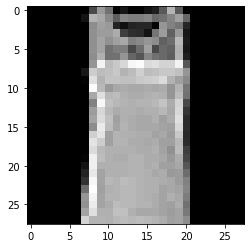

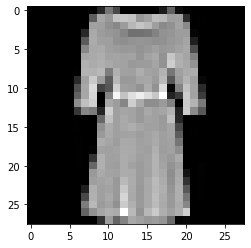

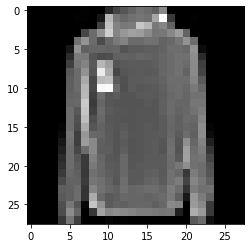

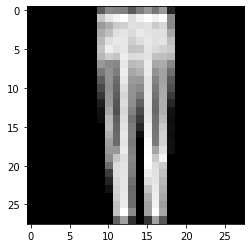

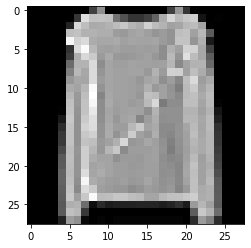

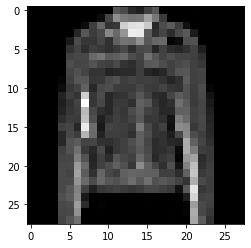

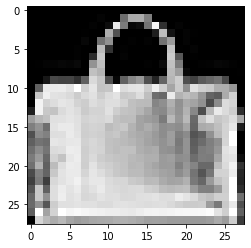

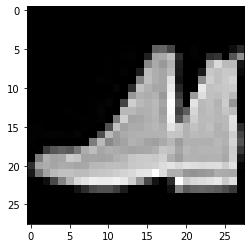

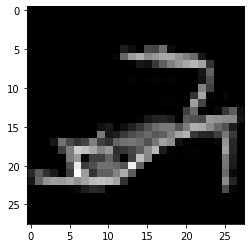

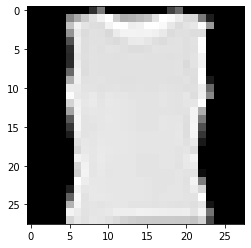

In [13]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.show()

## CNN Model

In [14]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [27]:
hist = model.fit(X_train,Y_train,epochs=27,shuffle=True,batch_size=256,validation_split=0.20)

Train on 6400 samples, validate on 1600 samples
Epoch 1/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6208 - accuracy: 0.7708 - val_loss: 0.6336 - val_accuracy: 0.7688
Epoch 2/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6197 - accuracy: 0.7667 - val_loss: 0.6274 - val_accuracy: 0.7706
Epoch 3/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6117 - accuracy: 0.7708 - val_loss: 0.6159 - val_accuracy: 0.7738
Epoch 4/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6071 - accuracy: 0.7736 - val_loss: 0.6112 - val_accuracy: 0.7781
Epoch 5/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6169 - accuracy: 0.7680 - val_loss: 0.6175 - val_accuracy: 0.7738
Epoch 6/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.6065 - accuracy: 0.7728 - val_loss: 0.6158 - val_accuracy: 0.7744
Epoch 7/27
6400/6400 [==============================] - 10s 2ms/step - loss: 0.595

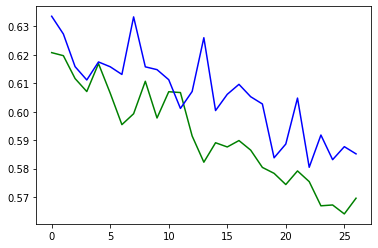

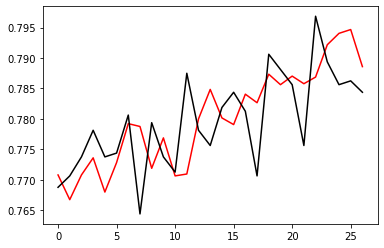

In [28]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

plt.figure(1)
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [30]:
model.evaluate(X_train,Y_train)[1]

8000/8000 [==============================] - 2s 247us/step


0.7910000085830688

In [32]:
model.evaluate(X_test,Y_test)[1]

2000/2000 [==============================] - 1s 256us/step


0.7724999785423279